<a href="https://colab.research.google.com/github/Shubhangidharmik/Bike-sharing-demand-prediction/blob/main/Shubhangi_Dharmik_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning/ACCESS DATA/BIKE DATA1.csv', encoding= 'ISO-8859–1')

In [4]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
dataset.shape

(8760, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [10]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# **Exploratory Data Analysis**

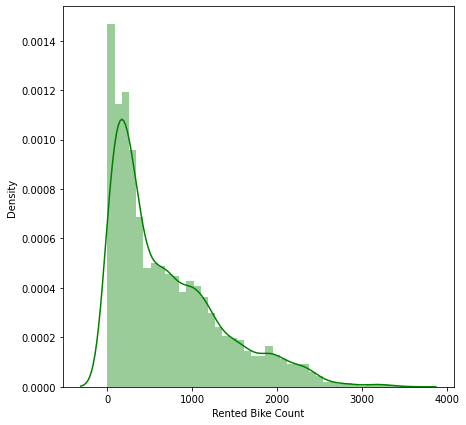

In [11]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Rented Bike Count'],color="g")

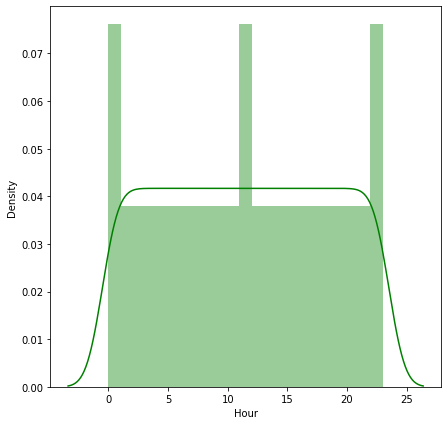

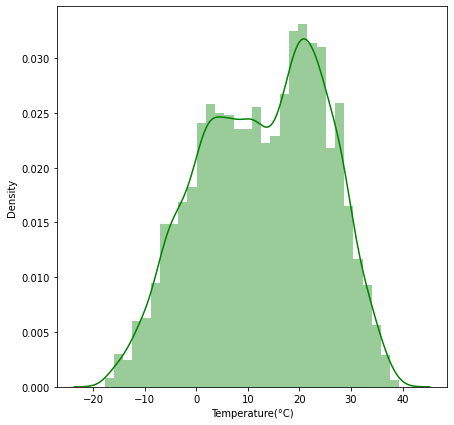

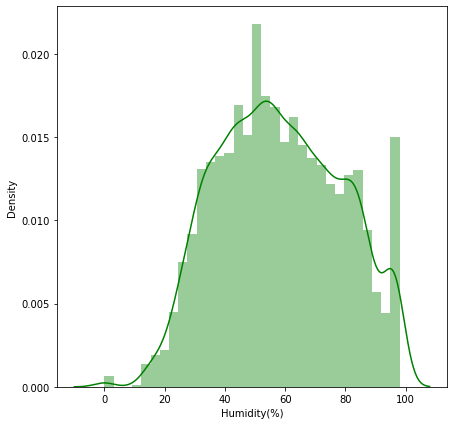

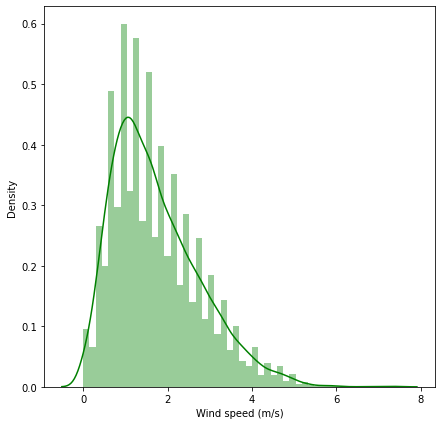

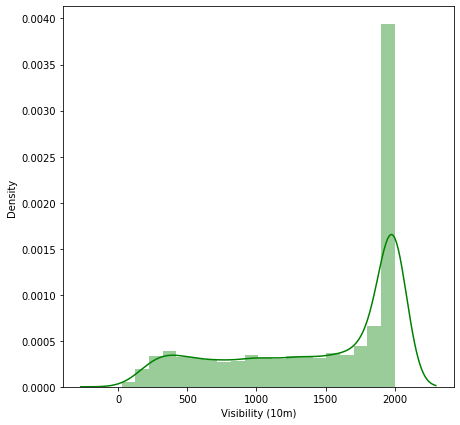

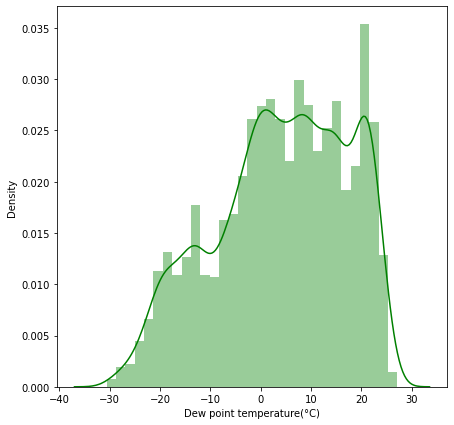

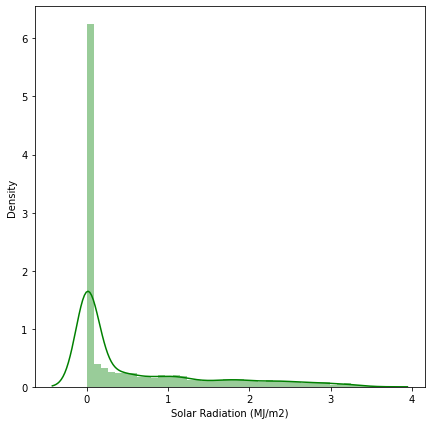

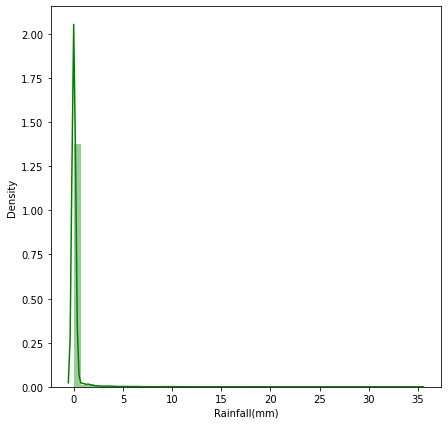

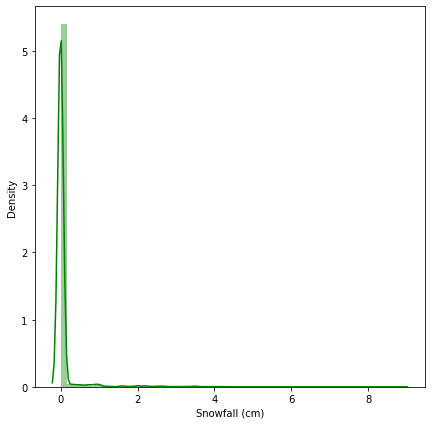

In [14]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['Hour'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['Temperature(°C)'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['Humidity(%)'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['Wind speed (m/s)'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['Visibility (10m)'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['Dew point temperature(°C)'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['Solar Radiation (MJ/m2)'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['Rainfall(mm)'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['Snowfall (cm)'],color="g")

In [15]:
categorical_features= ['Seasons', 'Holiday', 'Functioning Day']
categorical_features

['Seasons', 'Holiday', 'Functioning Day']

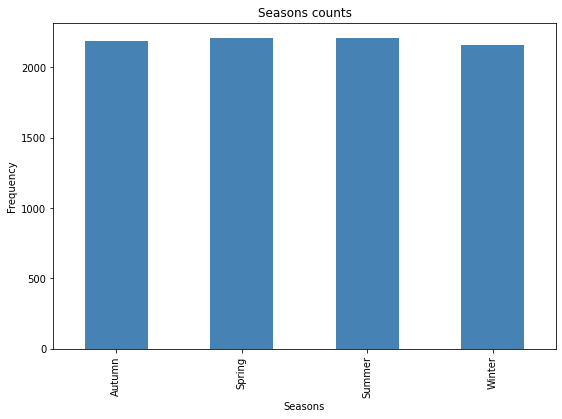

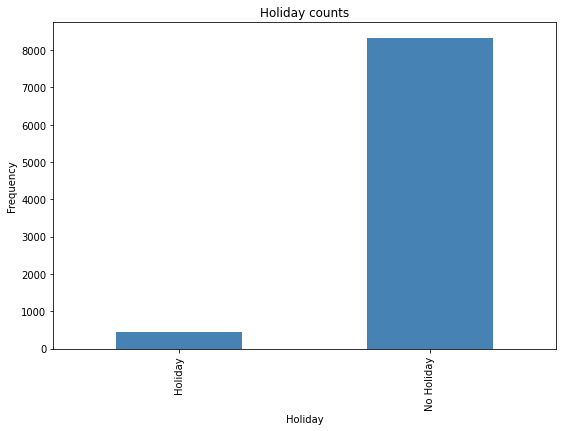

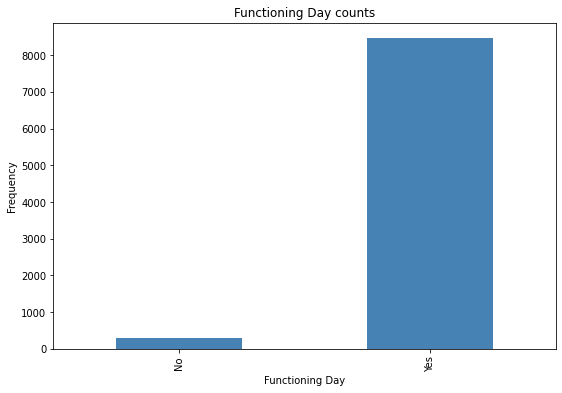

In [16]:
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

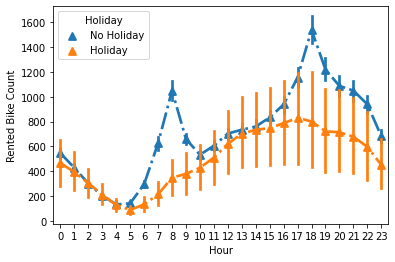

In [17]:
sns.pointplot(x = "Hour",
              y = "Rented Bike Count",
              linestyles = '-.',
              markers = '^',
              hue = "Holiday",
              data = dataset)
# show the plot
plt.show()

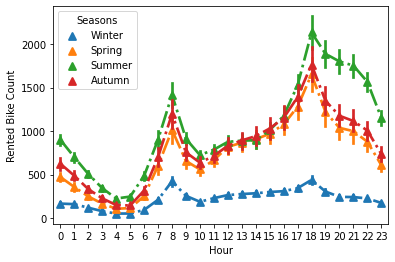

In [18]:
sns.pointplot(x = "Hour",
              y = "Rented Bike Count",
              linestyles = '-.',
              markers = '^',
              hue = "Seasons",
              data = dataset)
# show the plot
plt.show()

**finding correlation**

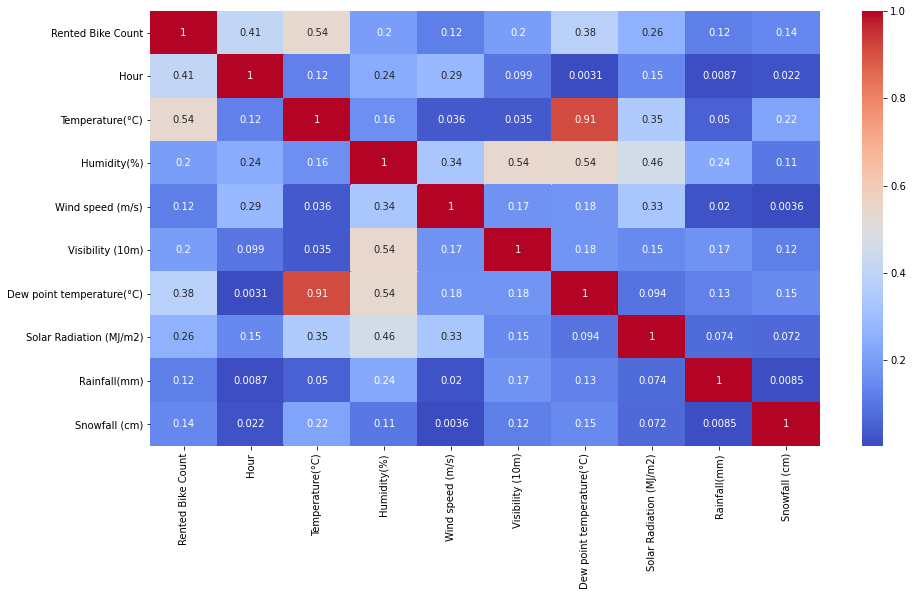

In [19]:
## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [20]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Date','Rented Bike Count']]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [22]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Date','Rented Bike Count','Temperature(°C)','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.846136
1,Humidity(%),3.647179
2,Wind speed (m/s),4.389514
3,Visibility (10m),4.691895
4,Solar Radiation (MJ/m2),1.718475
5,Rainfall(mm),1.078747
6,Snowfall (cm),1.050534


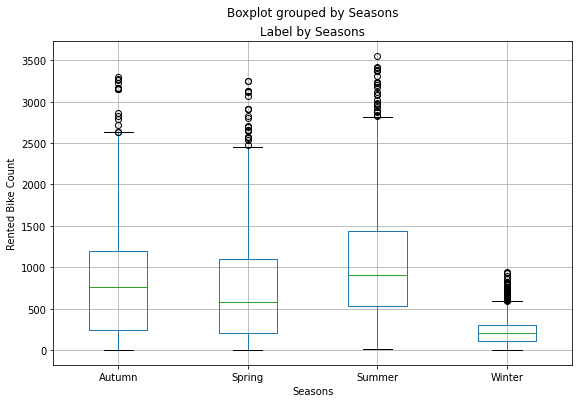

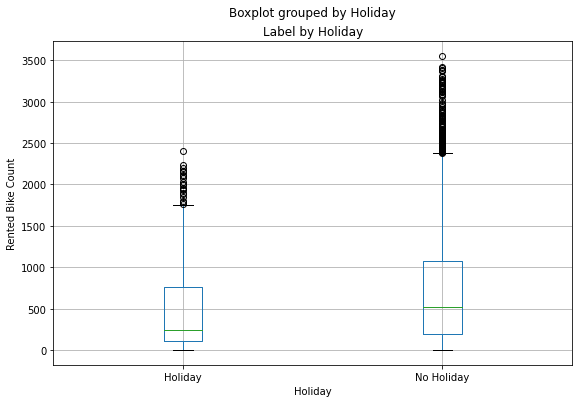

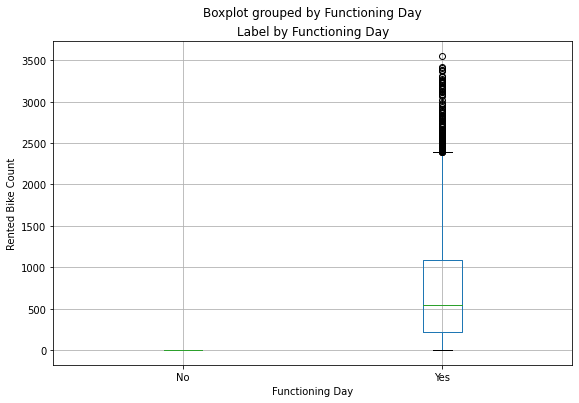

In [23]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [24]:
numeric_features=['Date','Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

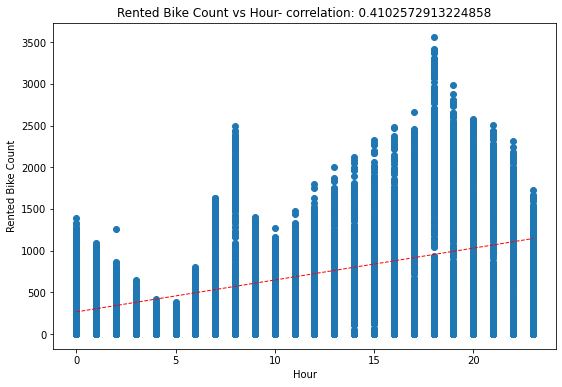

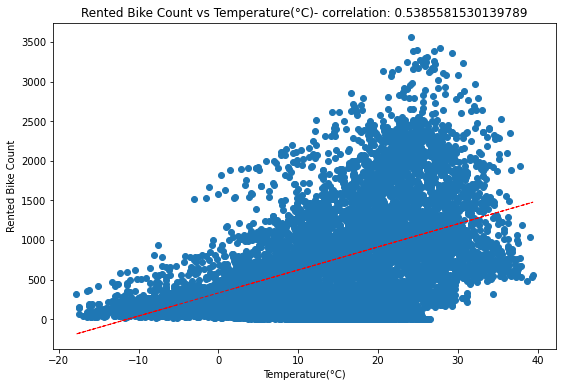

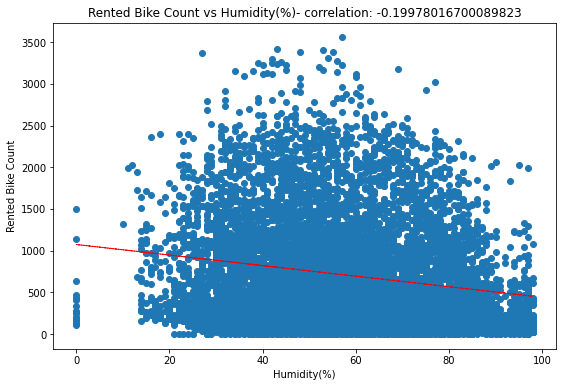

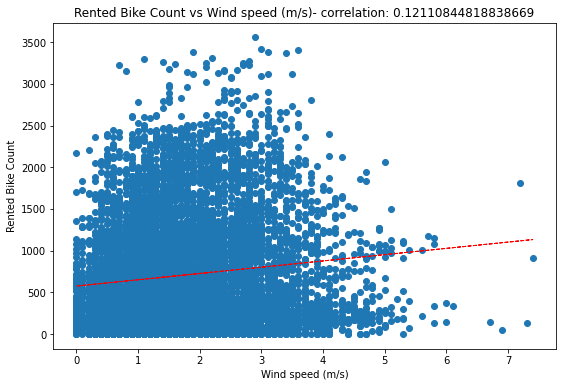

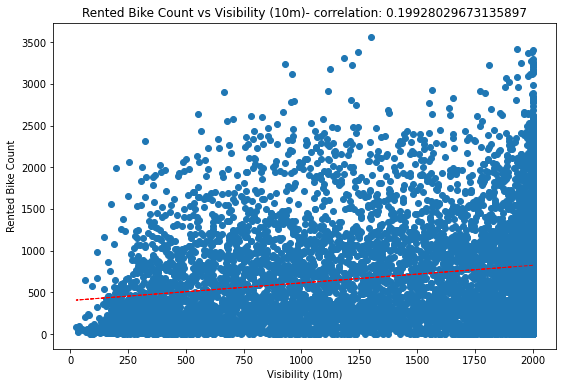

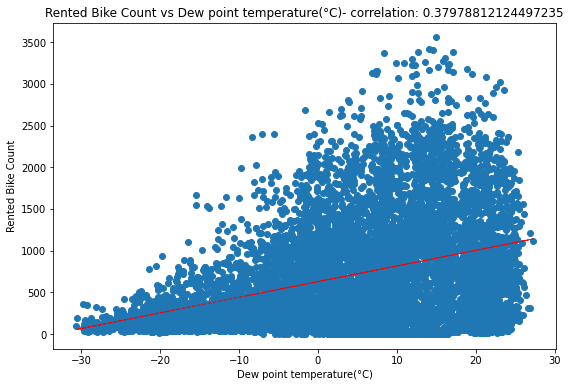

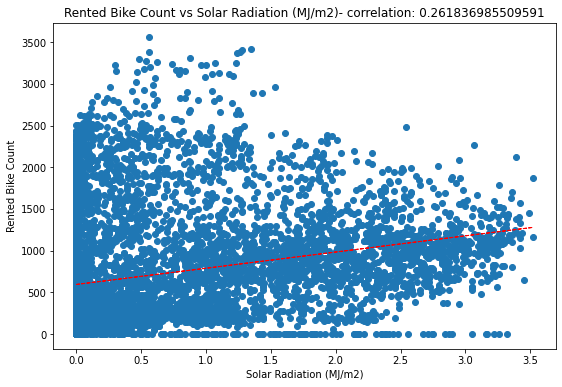

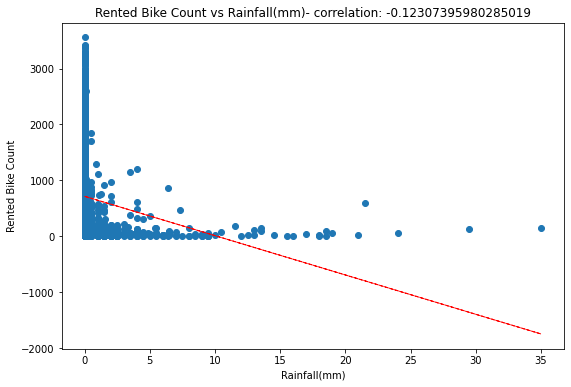

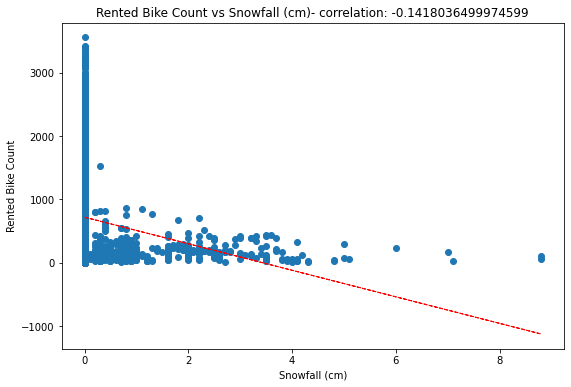

In [25]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

In [26]:
dataset['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [27]:
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [28]:
dataset['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

**one hot encoding**

**dummy variables**

In [29]:
#One hot encoding
dataset_pr = pd.get_dummies(dataset, columns=["Seasons", "Holiday","Functioning Day"], prefix=["body", "etype","fsystem"], drop_first=True)

In [30]:
dataset_pr.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),body_Spring,body_Summer,body_Winter,etype_No Holiday,fsystem_Yes
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1


In [31]:
feature=['Hour',	'Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)',	'body_Spring',	'body_Summer',	'body_Winter',	'etype_No Holiday',	'fsystem_Yes']

In [32]:
# x is independent variables and y is dependent variables
from scipy.stats import zscore
x= dataset_pr[feature].apply(zscore)
y= dataset_pr['Rented Bike Count']

In [33]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),body_Spring,body_Summer,body_Winter,etype_No Holiday,fsystem_Yes
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.580514,-0.580514,1.748015,0.227757,0.18668
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.580514,-0.580514,1.748015,0.227757,0.18668
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,-0.580514,-0.580514,1.748015,0.227757,0.18668
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.580514,-0.580514,1.748015,0.227757,0.18668
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,-0.580514,-0.580514,1.748015,0.227757,0.18668


# **Train test split**

In [34]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)

(7008, 14)
(1752, 14)


In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [36]:
reg.score(x_train, y_train)

0.5516435713892203

In [37]:
reg.coef_

array([ 189.44331037,  172.45273826, -226.08906294,   20.2026772 ,
         10.61709145,  167.43419883,  -65.91402938,  -62.9946875 ,
         12.67663842,  -54.6346913 ,  -62.06760269, -154.08429545,
         25.07264242,  167.98466927])

In [38]:
reg.intercept_

708.0597399722078

In [39]:
y_pred = reg.predict(x_test)
y_pred

array([ 422.5538624 ,  767.19025326,  505.38033752, ...,  202.33733768,
       1185.53457009,  510.51580517])

In [67]:
# Predicting and Calculating the Metrices for Prediction of Testing Dataset
prediction_test_lr = reg.predict(x_test)

r2_test_lr = r2_score(y_test, prediction_test_lr)
rms_test_lr = sqrt(mean_squared_error(y_test, prediction_test_lr))
mae_test_lr = mean_absolute_error(y_test,prediction_test_lr)
mape_test_lr = np.mean(np.abs((y_test - prediction_test_lr) / y_test)) * 100

# Predicting and Calculating the Metrices for Prediction of Training Dataset
prediction_train_lr = reg.predict(x_train)

r2_train_lr = r2_score(y_train, prediction_train_lr)
rms_train_lr = sqrt(mean_squared_error(y_train, prediction_train_lr))
mae_train_lr = mean_absolute_error(y_train,prediction_train_lr)
mape_train_lr = np.mean(np.abs((y_train - prediction_train_lr) / y_train)) * 100

In [68]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_lr)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_lr)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_lr)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_lr)))
print('MAE for Training Data:',float("{0:.2f}".format(mae_train_lr)))
print('MAE for Testing Data:',float("{0:.2f}".format(mae_test_lr)))
print('MAPE for Training Data:',float("{0:.2f}".format(mape_train_lr)))
print('MAPE for Testing Data:',float("{0:.2f}".format(mape_test_lr)))

R Squared for Training Data: 0.55
R Squared for Testing Data: 0.54
RMS for Training Data: 431.48
RMS for Testing Data: 436.59
MAE for Training Data: 322.21
MAE for Testing Data: 326.49
MAPE for Training Data: inf
MAPE for Testing Data: inf


# **Lasso regression**

In [40]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
lasso.coef_

array([ 189.44331523,  172.45788358, -226.08609584,   20.20247024,
         10.61720676,  167.42743425,  -65.91378105,  -62.99469149,
         12.67642027,  -54.63440418,  -62.06697935, -154.08414508,
         25.07252934,  167.9844497 ])

In [42]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [43]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -187321.47450543335


In [60]:
y_pred_lasso = lasso_regressor.predict(x_test)
y_pred_lasso1 = lasso_regressor.predict(x_train)

In [64]:
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [65]:
r2_test = r2_score(y_test, y_pred_lasso)
rms_test = sqrt(mean_squared_error(y_test, y_pred_lasso))

r2_train = r2_score(y_train, y_pred_lasso1)
rms_train = sqrt(mean_squared_error(y_train, y_pred_lasso1))

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [66]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test)))


R Squared for Training Data: 0.55
R Squared for Testing Data: 0.54
RMS for Training Data: 431.48
RMS for Testing Data: 436.6


# **Ridge regression**

In [46]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [47]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -187074.03180604964


In [70]:
y_pred_ridge = ridge_regressor.predict(x_test)
y_pred_ridge1 = ridge_regressor.predict(x_train)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [71]:
r2_test_ridge = r2_score(y_test, y_pred_ridge)
rms_test_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))

r2_train_ridge = r2_score(y_train, y_pred_ridge1)
rms_train_ridge = sqrt(mean_squared_error(y_train, y_pred_ridge1))

In [72]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_ridge)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_ridge)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_ridge)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_ridge)))

R Squared for Training Data: 0.55
R Squared for Testing Data: 0.54
RMS for Training Data: 431.49
RMS for Testing Data: 436.63


# **Elastic Net**

In [48]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [50]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
elasticnet.score(x_train, y_train)

0.5494737739428015

In [76]:
y_pred_en = elasticnet.predict(x_test)
y_pred_en1 = elasticnet.predict(x_train)

In [77]:
r2_test_en = r2_score(y_test, y_pred_en)
rms_test_en = sqrt(mean_squared_error(y_test, y_pred_en))

r2_train_en = r2_score(y_train, y_pred_en1)
rms_train_en = sqrt(mean_squared_error(y_train, y_pred_en1))

In [78]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_en)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_en)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_en)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_en)))

R Squared for Training Data: 0.55
R Squared for Testing Data: 0.54
RMS for Training Data: 432.52
RMS for Testing Data: 438.68


In [55]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [56]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.3}

Using  {'alpha': 0.01, 'l1_ratio': 0.3}  the negative mean squared error is:  -187229.6260093746


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [80]:
y_pred_elastic = elastic_regressor.predict(x_test)
y_pred_elastic1 = elastic_regressor.predict(x_train)

In [81]:
r2_test_p = r2_score(y_test, y_pred_elastic)
rms_test_p = sqrt(mean_squared_error(y_test, y_pred_elastic))

r2_train_q = r2_score(y_train, y_pred_elastic1)
rms_train_q = sqrt(mean_squared_error(y_train, y_pred_elastic1))

In [82]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_q)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_p)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_q)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_p)))

R Squared for Training Data: 0.55
R Squared for Testing Data: 0.54
RMS for Training Data: 431.52
RMS for Testing Data: 436.74


# **Conclusions**



We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set. We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

•	Season: We see highest number bike rentals in Summer Seasons and the lowest in Spring season.

•	Weather: As one would expect, we see highest number of bike rentals on a clear day and the lowest on a snowy or rainy day.

•	Humidity: With increasing humidity, we see decrease in the number of bike rental count.

